In [83]:
import pandas as pd
import numpy as np
# sample data
X = ['Disagree', 'Strongly Disagree', 'Disagree', 'Agree', 'Strongly Agree', 'Disagree', 'Agree', 'Strongly Agree']
X = pd.DataFrame(X, columns=['Attitude'])
print(X)

            Attitude
0           Disagree
1  Strongly Disagree
2           Disagree
3              Agree
4     Strongly Agree
5           Disagree
6              Agree
7     Strongly Agree


In [84]:
# label encoding
def lable_encode(df, cols):
    df[cols] = df[cols].astype('category')
    output = df[cols].cat.codes
    return output
lable_encode(X, 'Attitude')

0    1
1    3
2    1
3    0
4    2
5    1
6    0
7    2
dtype: int8

In [85]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
# sample data
X = ['Disagree', 'Strongly Disagree', 'Disagree', 'Agree', 'Strongly Agree', 'Disagree', 'Agree', 'Strongly Agree']
X = pd.DataFrame(X, columns=['Attitude'])
# label encoding
def lable_encode(df, cols):
    
    for col in cols:
        encoder = LabelEncoder()
        #encoder.fit(df[col])
        df[col+'_encode'] = encoder.fit_transform(df[col])
    return df
lable_encode(X, ['Attitude'])

,Attitude,Attitude_encode
0,Disagree,1
1,Strongly Disagree,3
2,Disagree,1
3,Agree,0
4,Strongly Agree,2
5,Disagree,1
6,Agree,0
7,Strongly Agree,2


In [86]:
import pandas as pd
import numpy as np
from pandas.api.types import CategoricalDtype
# sample data
X = ['Disagree', 'Strongly Disagree', 'Disagree', 'Agree', 'Strongly Agree', 'Disagree', 'Agree', 'Strongly Agree']
X = pd.DataFrame(X, columns=['Attitude'])
# ordinal encoding
def ordinal_encode(df, cols, order):
    encode_order = CategoricalDtype(order, ordered=True)
    df[cols] = df[cols].astype(encode_order)
    output = df[cols].cat.codes
    return output
ordinal_encode(X, 'Attitude', ['Strongly     Disagree','Disagree','Agree','Strongly Agree'])

0    1
1   -1
2    1
3    2
4    3
5    1
6    2
7    3
dtype: int8

In [87]:
import pandas as pd
import numpy as np
# sample data
X = ['Disagree', 'Strongly Disagree', 'Disagree', 'Agree', 'Strongly Agree', 'Disagree', 'Agree', 'Strongly Agree']
X = pd.DataFrame(X, columns=['Attitude'])
# one-hot encoding
pd.get_dummies(X, columns=["Attitude"])

,Attitude_Agree,Attitude_Disagree,Attitude_Strongly Agree,Attitude_Strongly Disagree
0,0,1,0,0
1,0,0,0,1
2,0,1,0,0
3,1,0,0,0
4,0,0,1,0
5,0,1,0,0
6,1,0,0,0
7,0,0,1,0


In [88]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder

# sample data
X = ['Disagree', 'Strongly Disagree', 'Disagree', 'Agree', 'Strongly Agree', 'Disagree', 'Agree', 'Strongly Agree']
X = pd.DataFrame(X, columns=['Attitude'])
# one-hot encoding
def onehot_encode(df, cols):
    
    temp = lable_encode(df, cols)
    encoder = OneHotEncoder(sparse=False)
    output = encoder.fit_transform(temp)
    return output
onehot_encode(X, ['Attitude'])

c:\Users\saifu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


array([[0., 1., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 1., 0.]])

In [89]:
# data preprocessing
import pandas as pd 
# for linear calculations
import numpy as np   
# Plotting Graphs
import seaborn as sns
import matplotlib.pyplot as plt 

df = pd.read_csv("./Encoding Data.csv")
# displaying top 10 results
df.head(10)

,id,bin_1,bin_2,nom_0,ord_2
0,0,F,N,Red,Hot
1,1,F,Y,Blue,Warm
2,2,F,N,Blue,Cold
3,3,F,N,Green,Warm
4,4,T,N,Red,Cold
5,5,T,N,Green,Hot
6,6,F,N,Red,Cold
7,7,T,N,Red,Cold
8,8,F,N,Blue,Warm
9,9,F,Y,Red,Hot


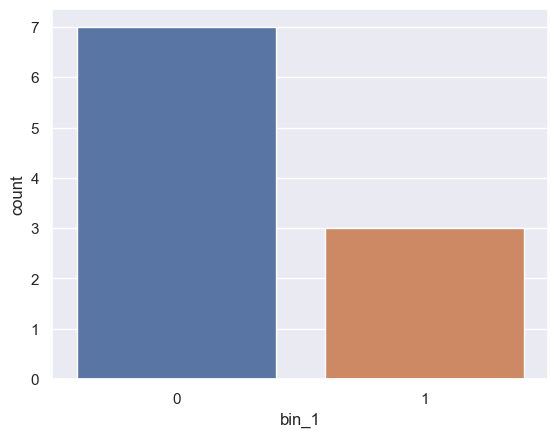

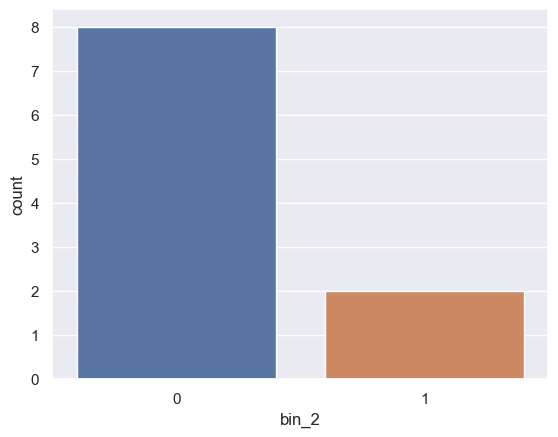

In [90]:
# you can always use simple mapping on binary features.
df['bin_1'] = df['bin_1'].apply(
    lambda x: 1 if x == 'T' else (0 if x == 'F' else None))
df['bin_2'] = df['bin_2'].apply(
    lambda x: 1 if x == 'Y' else (0 if x == 'N' else None))
sns.countplot(x='bin_1', data=df)
plt.show()
sns.countplot(x='bin_2', data=df)
plt.show()

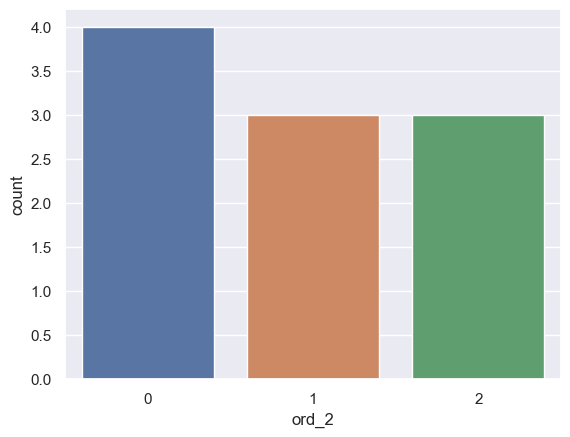

In [91]:
# labelEncoder present in scikitlearn library
from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder()
df['ord_2'] = le.fit_transform(df['ord_2'])
sns.set(style ="darkgrid")
sns.countplot(x='ord_2', data=df)
plt.show()

In [92]:
df

,id,bin_1,bin_2,nom_0,ord_2
0,0,0,0,Red,1
1,1,0,1,Blue,2
2,2,0,0,Blue,0
3,3,0,0,Green,2
4,4,1,0,Red,0
5,5,1,0,Green,1
6,6,0,0,Red,0
7,7,1,0,Red,0
8,8,0,0,Blue,2
9,9,0,1,Red,1


In [93]:
pd_enc = pd.get_dummies(df, prefix=['nom_0'], columns=['nom_0'])
pd_enc.head(10)

,id,bin_1,bin_2,ord_2,nom_0_Blue,nom_0_Green,nom_0_Red
0,0,0,0,1,0,0,1
1,1,0,1,2,1,0,0
2,2,0,0,0,1,0,0
3,3,0,0,2,0,1,0
4,4,1,0,0,0,0,1
5,5,1,0,1,0,1,0
6,6,0,0,0,0,0,1
7,7,1,0,0,0,0,1
8,8,0,0,2,1,0,0
9,9,0,1,1,0,0,1


In [94]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
# transforming the column after fitting
enc = enc.fit_transform(df[['nom_0']]).toarray()
# converting arrays to a dataframe
encoded_colm = pd.DataFrame(enc)
# concatenating dataframes
df = pd.concat([df, encoded_colm], axis=1)
df.head(10)

,id,bin_1,bin_2,nom_0,ord_2,0,1,2
0,0,0,0,Red,1,0.0,0.0,1.0
1,1,0,1,Blue,2,1.0,0.0,0.0
2,2,0,0,Blue,0,1.0,0.0,0.0
3,3,0,0,Green,2,0.0,1.0,0.0
4,4,1,0,Red,0,0.0,0.0,1.0
5,5,1,0,Green,1,0.0,1.0,0.0
6,6,0,0,Red,0,0.0,0.0,1.0
7,7,1,0,Red,0,0.0,0.0,1.0
8,8,0,0,Blue,2,1.0,0.0,0.0
9,9,0,1,Red,1,0.0,0.0,1.0


,id,bin_1,bin_2,nom_0,ord_2,0,1,2,nom_0_freq_encode
0,0,0,0,Red,1,0.0,0.0,1.0,0.5
1,1,0,1,Blue,2,1.0,0.0,0.0,0.3
2,2,0,0,Blue,0,1.0,0.0,0.0,0.3
3,3,0,0,Green,2,0.0,1.0,0.0,0.2
4,4,1,0,Red,0,0.0,0.0,1.0,0.5
5,5,1,0,Green,1,0.0,1.0,0.0,0.2
6,6,0,0,Red,0,0.0,0.0,1.0,0.5
7,7,1,0,Red,0,0.0,0.0,1.0,0.5
8,8,0,0,Blue,2,1.0,0.0,0.0,0.3
9,9,0,1,Red,1,0.0,0.0,1.0,0.5


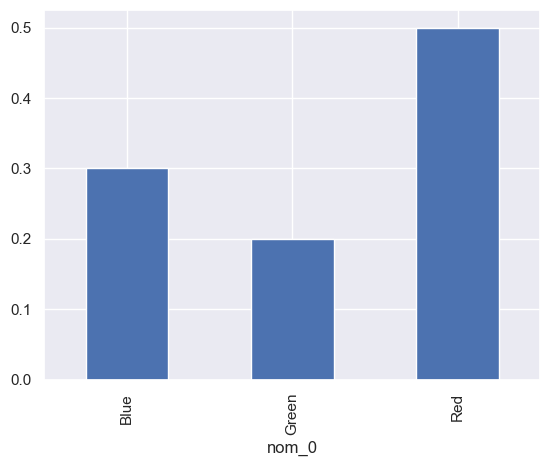

In [95]:
# grouping by frequency
fq = df.groupby('nom_0').size()/len(df)
# mapping values to dataframe
df.loc[:, "{}_freq_encode".format('nom_0')] = df['nom_0'].map(fq)

fq.plot.bar(stacked=True)
df.head(10)

In [96]:
# inserting Target column in the dataset since it needs a target
df.insert(5, "Target", [0, 1, 1, 0, 0, 1, 0, 0, 0, 1], True)
# importing TargetEncoder
from category_encoders import TargetEncoder
Targetenc = TargetEncoder()
# transforming the column after fitting
values = Targetenc.fit_transform(X = df.nom_0, y = df.Target)
# concatenating values with dataframe
df = pd.concat([df, values], axis = 1)
df.head(10)

,id,bin_1,bin_2,nom_0,ord_2,Target,0,1,2,nom_0_freq_encode,nom_0
0,0,0,0,Red,1,0,0.0,0.0,1.0,0.5,0.363515
1,1,0,1,Blue,2,1,1.0,0.0,0.0,0.3,0.441191
2,2,0,0,Blue,0,1,1.0,0.0,0.0,0.3,0.441191
3,3,0,0,Green,2,0,0.0,1.0,0.0,0.2,0.414185
4,4,1,0,Red,0,0,0.0,0.0,1.0,0.5,0.363515
5,5,1,0,Green,1,1,0.0,1.0,0.0,0.2,0.414185
6,6,0,0,Red,0,0,0.0,0.0,1.0,0.5,0.363515
7,7,1,0,Red,0,0,0.0,0.0,1.0,0.5,0.363515
8,8,0,0,Blue,2,0,1.0,0.0,0.0,0.3,0.441191
9,9,0,1,Red,1,1,0.0,0.0,1.0,0.5,0.363515


In [97]:
from category_encoders import BinaryEncoder
encoder = BinaryEncoder(cols =['ord_2'])
# transforming the column after fitting
newdata = encoder.fit_transform(df['ord_2'])
# concatenating dataframe
df = pd.concat([df, newdata], axis = 1)
# dropping old column
df = df.drop(['ord_2'], axis = 1)
df.head(10)

,id,bin_1,bin_2,nom_0,Target,0,1,2,nom_0_freq_encode,nom_0,ord_2_0,ord_2_1
0,0,0,0,Red,0,0.0,0.0,1.0,0.5,0.363515,0,1
1,1,0,1,Blue,1,1.0,0.0,0.0,0.3,0.441191,1,0
2,2,0,0,Blue,1,1.0,0.0,0.0,0.3,0.441191,1,1
3,3,0,0,Green,0,0.0,1.0,0.0,0.2,0.414185,1,0
4,4,1,0,Red,0,0.0,0.0,1.0,0.5,0.363515,1,1
5,5,1,0,Green,1,0.0,1.0,0.0,0.2,0.414185,0,1
6,6,0,0,Red,0,0.0,0.0,1.0,0.5,0.363515,1,1
7,7,1,0,Red,0,0.0,0.0,1.0,0.5,0.363515,1,1
8,8,0,0,Blue,0,1.0,0.0,0.0,0.3,0.441191,1,0
9,9,0,1,Red,1,0.0,0.0,1.0,0.5,0.363515,0,1
